In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Walmart_sales.csv')

df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Weekly_Sales']=df['Weekly_Sales']/10**5
cd=df['Store']==1;
cols=['Date','Weekly_Sales']
points = df.loc[cd,cols]

In [14]:
def Error(m,c,points):
    E=0;
    for i in range(len(points)):
        x=points['Date'][i].day
        y=points['Weekly_Sales'][i]
        E+=(y-m*x-c)**2
    return E/len(points)

In [15]:
def correctmc(m,c,points,L):
    dm=dc=0;
    for i in range(len(points)):
        x=points['Date'][i].day
        y=points['Weekly_Sales'][i]
        dm-=2*x*(y-m*x-c)
        dc-=2*(y-m*x-c)
    dm=dm/len(points)
    dc=dc/len(points)
    m=m-L*dm
    c=c-L*dc
    return m,c


In [16]:
epochs=1000
L=0.001
m=0
c=17

print(Error(m,c,points))
for i in range(epochs):
    m,c=correctmc(m,c,points,L)
print(Error(m,c,points))
print(m,c)


4.510825466770921
2.2811155624588304
-0.06903869377335779 16.736455631937158


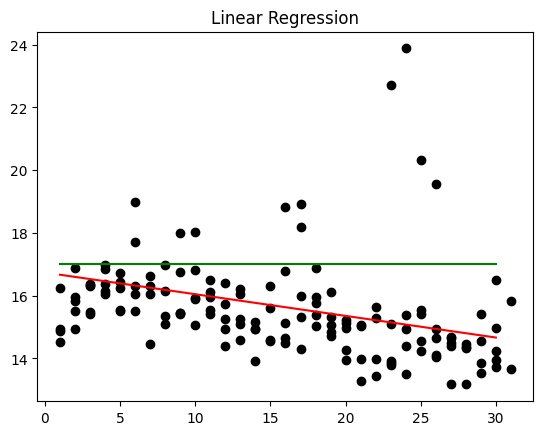

In [17]:
plt.scatter(points['Date'].dt.day,points['Weekly_Sales'],color='black')
plt.plot(list(range(1,31)),[m*x+c for x in range(1,31)],color='red')
plt.plot(list(range(1,31)),[17 for x in range(1,31)],color='green')
plt.title("Linear Regression")
plt.show()
